###Importing Libraries


In [1]:
# General tools
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# For validation
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,confusion_matrix


# For curve fitting
from scipy.optimize import curve_fit

## Data
create csv file and open from Dataframe just to stantesize the project

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
diabetes = pd.read_csv("dataset/diabetes_prediction_dataset.csv")

In [4]:
df = diabetes.copy()

## Explore 

In [5]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None
(100000, 9)


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


In [7]:
#nulls = print(df.isnull().sum())
nulls = pd.DataFrame(df.isna().sum())
nulls['ratio'] = nulls / df.shape[0]
nulls
#print(nulls)
#print(df.groupby('gender').size())
#print(df['gender'].value_counts())
#print(df.groupby('smoking_history').size())

,0,ratio
gender,0,0.0
age,0,0.0
hypertension,0,0.0
heart_disease,0,0.0
smoking_history,0,0.0
bmi,0,0.0
HbA1c_level,0,0.0
blood_glucose_level,0,0.0
diabetes,0,0.0


In [8]:
df['gender'].value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

In [9]:
df = df[df['gender'] != 'Other']

In [12]:
age_min = df['age'].min()
age_max = df['age'].max()

print('The youngest age is ', age_min, ' and the oldest age is ', age_max)

The youngest age is  0.08  and the oldest age is  80.0


<AxesSubplot:xlabel='age', ylabel='age_cnt'>

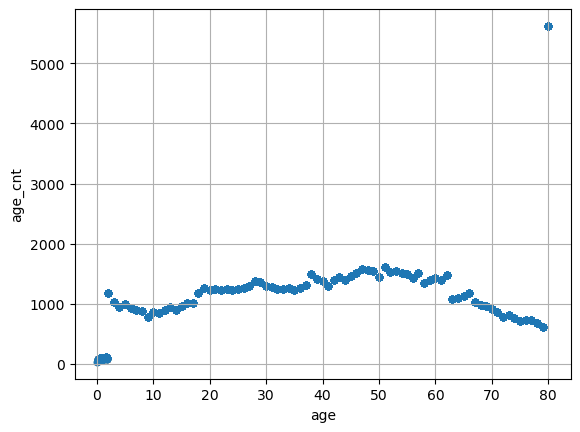

In [18]:
df.plot.scatter(x='age', y='age_cnt', alpha = 0.05, grid = True)

<AxesSubplot:>

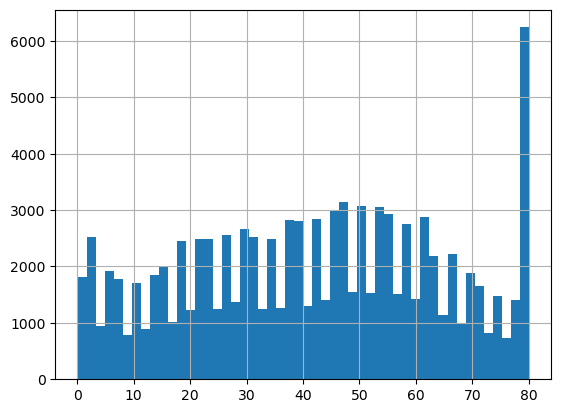

In [17]:
df.age.hist(bins = 50)

In [140]:
age_outliers = df[df['age'] < 1]['age']
df = df[~df['age'].between(0, 0.99)]
print(age_outliers)

155      0.08
218      0.56
241      0.88
268      0.16
396      0.16
         ... 
99452    0.32
99536    0.40
99629    0.64
99778    0.32
99911    0.32
Name: age, Length: 911, dtype: float64


In [141]:
df.shape

(99071, 9)

In [128]:
#print(df['smoking_history'].value_counts())#.shape
df.groupby(['gender','smoking_history']).size().unstack()
#df.groupby('gender')['smoking_history'].value_counts(normalize=True).unstack()

smoking_history,No Info,current,ever,former,never,not current
gender,,,,,,
Female,19700,5058,2238,4774,22869,3913
Male,16110,4228,1765,4578,12223,2526


In [15]:
#diabetes.groupby('age').apply(len)
dim_table = diabetes['age'].value_counts().sort_values().rename('age_cnt')
df = df.join(dim_table, on ='age')


In [ ]:
df.plot.scatter(x='age', y='age_cnt', alpha = 0.05, grid = True)

In [ ]:
plt.figure(figsize=(8, 6))

df.boxplot(column='age', patch_artist=True, notch=True, flierprops=dict(marker='o', markersize=2))

plt.ylabel('Values')
plt.title('Boxplot of age')


plt.show()

In [ ]:
print(df[df.columns])

##Visualization
###looking for Outliners

In [ ]:
#df['age'].plot.hist(bins = 50)

## Eda
Cleaning data

In [ ]:
df_young_diabetes = df[(df['age'] < 13) & (df['diabetes'] == 1)]

df_young_diabetes.shape

(36, 10)

In [ ]:
df['diabetes'].value_counts()#.shape

0    90571
1     8500
Name: diabetes, dtype: int64

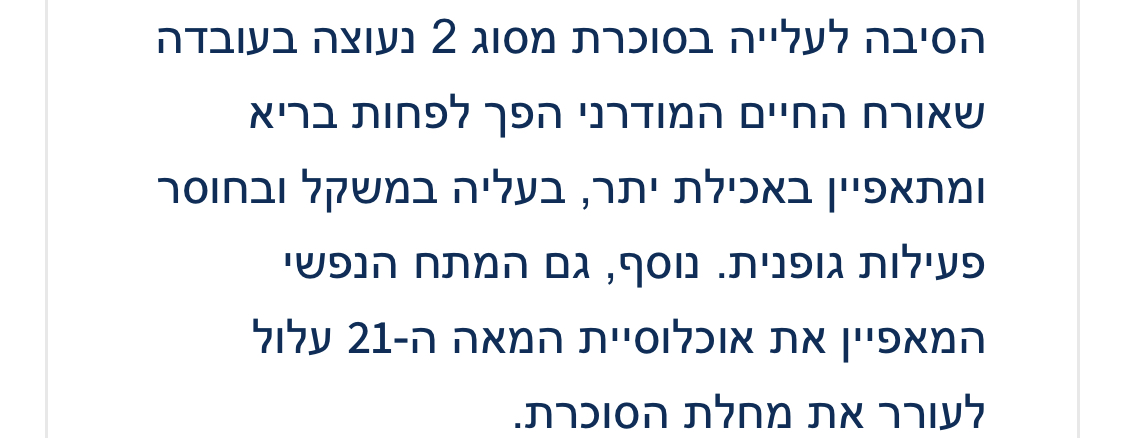

In [142]:
# Creating a new column representing all type 2 diabetics, as type I diabetics are typically diagnosed at less than 13-14 years of age. 
# Source : https://www.cdc.gov/diabetes/basics/diabetes-type-1-diagnosis.html#:~:text=The%20peak%20age%20for%20being,older%20(even%20over%2040).
df.loc[(df['diabetes'] == 1) & (df['age'] < 13), 'type_II_diabetic'] = 1
df['type_II_diabetic'].fillna(0, inplace=True)
df['type_II_diabetic'] = df['type_II_diabetic'].astype('int64')
df['type_II_diabetic'].value_counts()
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes',
       'type_II_diabetic'],
      dtype='object')

In [ ]:
df['hypertension'].value_counts()

df['heart_disease'].value_counts()

df['smoking_history'].value_counts()

df_nonpossible_smokers = df[df['age'] < 10]
smoking_values = df_nonpossible_smokers['smoking_history'].unique()

print(smoking_values)
['No Info' 'never' 'not current' 'current' 'ever' 'former']
# Filling all values for smoking history under 10 years old as 'never'
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3410476/#:~:text=Tobacco%20use%20is%20normally%20established%20in%20the%20teenage%20years%2C%20with,of%2015%20years%20%5B2%5D.

df.loc[df['age'] < 15, 'smoking_history'] = 'never'
plt.figure(figsize=(8, 6))

df.boxplot(column='bmi', patch_artist=True, notch=True, flierprops=dict(marker='o', markersize=2))

plt.ylabel('Values')
plt.title('Boxplot of BMI')


plt.show()

In [ ]:
bmi_min = df['bmi'].min()
bmi_max = df['bmi'].max()

print('The smallest bmi is ', bmi_min, ' and the largest bmi is ', bmi_max)

The smallest bmi is  10.01  and the largest bmi is  95.69


In [ ]:
plt.figure(figsize=(8, 6))

df.boxplot(column='HbA1c_level', patch_artist=True, notch=True, flierprops=dict(marker='o', markersize=2))

plt.ylabel('Values')
plt.title('Boxplot of HbA1c_level')


plt.show()

In [ ]:
HbA1c_level_min = df['HbA1c_level'].min()
HbA1c_level_max = df['HbA1c_level'].max()

print('The smallest HbA1c_level is ', HbA1c_level_min, ' and the largest HbA1c_level is ', HbA1c_level_max)

The smallest HbA1c_level is  3.5  and the largest HbA1c_level is  9.0


In [ ]:
plt.figure(figsize=(8, 6))

df.boxplot(column='blood_glucose_level', patch_artist=True, notch=True, flierprops=dict(marker='o', markersize=2))

plt.ylabel('Values')
plt.title('Boxplot of blood_glucose_level')


plt.show()

In [ ]:
blood_glucose_level_min = df['blood_glucose_level'].min()
blood_glucose_level_max = df['blood_glucose_level'].max()

print('The smallest blood_glucose_level is ', blood_glucose_level_min, ' and the largest blood_glucose_level is ', blood_glucose_level_max)

The smallest blood_glucose_level is  80  and the largest blood_glucose_level is  300


In [143]:
df['diabetes'].value_counts()

0    90571
1     8500
Name: diabetes, dtype: int64

In [ ]:
# Exporting current dataframe to csv file to use for analysis 
df.to_csv('analysis_diabetes_prediction_dataset.csv', index = False)
#create csv file


## Analysis

In [ ]:
#dfa = dataframe for analysis
dfa = df.copy()

In [ ]:
dfa.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_cnt,type_II_diabetic
0,Female,80.0,0,1,never,25.19,6.6,140,0,5621,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,1506,0
2,Male,28.0,0,0,never,27.32,5.7,158,0,1377,0
3,Female,36.0,0,0,current,23.45,5.0,155,0,1257,0
4,Male,76.0,1,1,current,20.14,4.8,155,0,733,0


In [ ]:
import seaborn as sns


The number of males and females who have diabetes in this dataset is :  Female    4461
Male      4039
Name: gender, dtype: int64


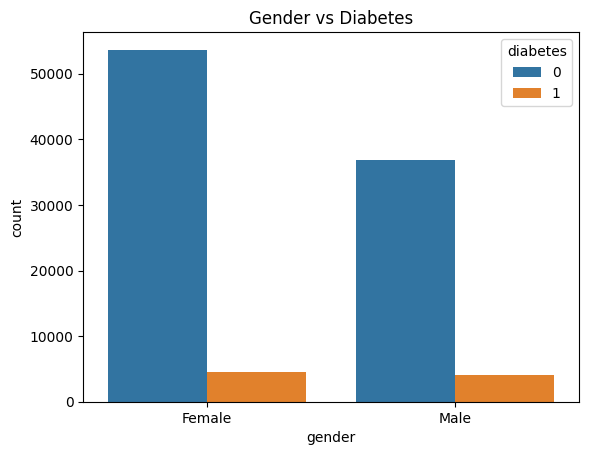

In [ ]:
sns.countplot(data= dfa, x='gender',hue='diabetes')
plt.title('Gender vs Diabetes')

diabetic_gender_counts = dfa[dfa['diabetes'] == 1]['gender'].value_counts()
print("The number of males and females who have diabetes in this dataset is : ", diabetic_gender_counts)

The number of males and females who have diabetes in this dataset is :  never          3384
former         1590
No Info        1421
current         947
not current     687
ever            471
Name: smoking_history, dtype: int64


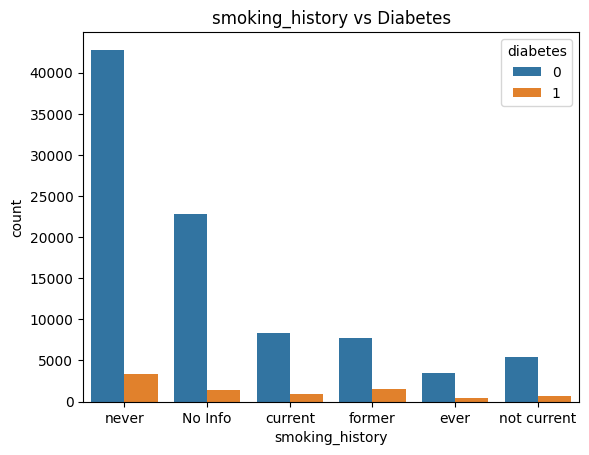

In [ ]:
sns.countplot(data= dfa, x='smoking_history',hue='diabetes')
plt.title('smoking_history vs Diabetes')

diabetic_smoking_counts = dfa[dfa['diabetes'] == 1]['smoking_history'].value_counts()
print("The number of males and females who have diabetes in this dataset is : ", diabetic_smoking_counts)

In [145]:
heart_disease_gender_counts = dfa[dfa['heart_disease'] == 1]['gender'].value_counts()
print("The Count of Males and Females Who Have Heart Disease in This Dataset : ", heart_disease_gender_counts)

The Count of Males and Females Who Have Heart Disease in This Dataset :  Male      2380
Female    1562
Name: gender, dtype: int64


(0.0, 10.0)

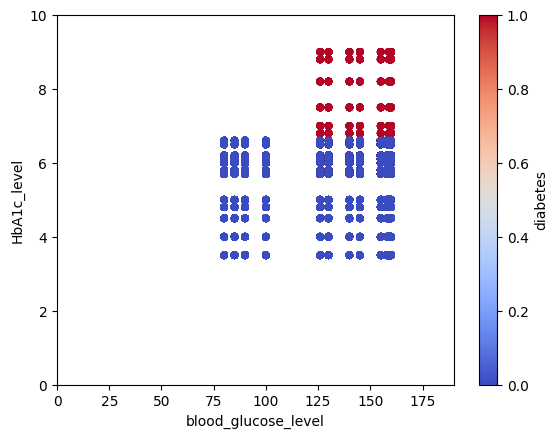

In [ ]:
ax = dfa.plot.scatter(x='blood_glucose_level', y='HbA1c_level', c='diabetes',cmap='coolwarm')
ax.set_xlim(0,190)
ax.set_ylim(0,10)

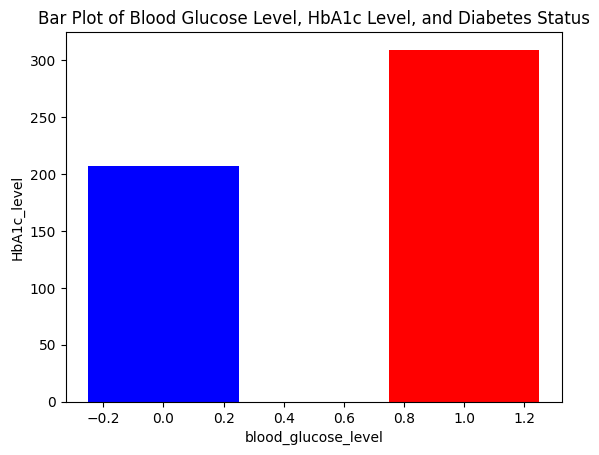

In [ ]:
import matplotlib.pyplot as plt
plt.bar(dfa['diabetes'], dfa['blood_glucose_level'], width=0.5, color=df['diabetes'].map({0: 'blue', 1: 'red'}))
plt.bar(dfa['diabetes'], dfa['HbA1c_level'], width=0.5, bottom=df['blood_glucose_level'], color=dfa['diabetes'].map({0: 'blue', 1: 'red'}))
plt.xlabel('blood_glucose_level')
plt.ylabel('HbA1c_level')
plt.title('Bar Plot of Blood Glucose Level, HbA1c Level, and Diabetes Status')
plt.show()

## df feature engineering


In [ ]:
dfm = df.copy()

In [ ]:
for x in dfm.columns : 
    print(x)

gender
age
hypertension
heart_disease
smoking_history
bmi
HbA1c_level
blood_glucose_level
diabetes
age_cnt
type_II_diabetic


In [ ]:
dfm.drop('type_II_diabetic', axis=1, inplace=True)

In [ ]:
# Creating a new column that represents if a person has all of hypertension, heart_disease or a smoking history of current or ever

dfm['has_all_conditions'] = ((df['hypertension'] == 1) & (df['heart_disease'] == 1) & 
                            ((df['smoking_history'] == 'current') | (df['smoking_history'] == 'ever'))).astype(int)

In [ ]:
dfm['has_all_conditions'].value_counts()

0    98883
1      188
Name: has_all_conditions, dtype: int64

In [ ]:
all_conditions_with_diabetes_count = df[(df['hypertension'] == 1) & (df['heart_disease'] == 1) &
                                  ((df['smoking_history'] == 'current') | (df['smoking_history'] == 'ever')) &
                                  (df['diabetes'] == 1)].shape[0]

print("Number of people with all conditions and diabetes:", all_conditions_with_diabetes_count)

Number of people with all conditions and diabetes: 73


In [ ]:
dfm.shape

(99071, 11)

In [ ]:
#Dropping all Type II diabetics
dfm = dfm.drop(dfm[(dfm['diabetes'] == 1) & (dfm['age'] < 13)].index)

In [ ]:
# 36 type 2 diabetics, as listed in newly created column in data cleaning
dfm.shape

(99035, 11)

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()

encoded_cols = ['gender', 'smoking_history']
for x in encoded_cols:
    dfm[x] = le.fit_transform(dfm[x])
    #print(dfm[x])

In [ ]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99035 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               99035 non-null  int64  
 1   age                  99035 non-null  float64
 2   hypertension         99035 non-null  int64  
 3   heart_disease        99035 non-null  int64  
 4   smoking_history      99035 non-null  int64  
 5   bmi                  99035 non-null  float64
 6   HbA1c_level          99035 non-null  float64
 7   blood_glucose_level  99035 non-null  int64  
 8   diabetes             99035 non-null  int64  
 9   age_cnt              99035 non-null  int64  
 10  has_all_conditions   99035 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 9.1 MB


In [ ]:
dfm.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_cnt,has_all_conditions
0,0,80.0,0,1,4,25.19,6.6,140,0,5621,0
1,0,54.0,0,0,0,27.32,6.6,80,0,1506,0
2,1,28.0,0,0,4,27.32,5.7,158,0,1377,0
3,0,36.0,0,0,1,23.45,5.0,155,0,1257,0
4,1,76.0,1,1,1,20.14,4.8,155,0,733,1


In [ ]:
# Exporting current dataframe to csv file to use for predictive modeling 
dfm.to_csv('models_diabetes_prediction_dataset.csv', index = False)


## Predictive Modeling


In [ ]:
dfm.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes', 'age_cnt',
       'has_all_conditions'],
      dtype='object')

In [ ]:
# Splitting the data into training and test
x = dfm.drop('diabetes', axis=1)
y = dfm['diabetes']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Scaling the data
scaler = StandardScaler()
#This step calculates the mean and standard deviation of each feature in our training set
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train.mean() == scaler.mean_
x_train.std() == scaler.scale_

gender                 False
age                    False
hypertension           False
heart_disease          False
smoking_history        False
bmi                    False
HbA1c_level            False
blood_glucose_level    False
age_cnt                False
has_all_conditions     False
dtype: bool

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train_scaled, y_train)

LogisticRegression()

In [ ]:
# Predicting on test set
y_pred_lr = logreg.predict(x_test_scaled)


### Evaluating the model

In [ ]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, f1_score

accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)

The logistic regression model has an accuracy score of: 0.9594082899984854 and a precision score of: 0.8656597774244833


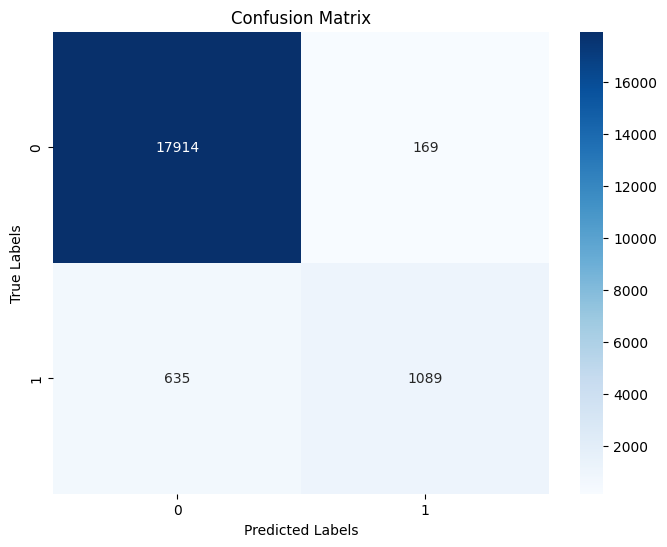

In [144]:
# Metrics
print("The logistic regression model has an accuracy score of:", accuracy_lr, "and a precision score of:", precision_lr)

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
#clf = logreg
clf = LogisticRegression()

#Fit
clf.fit(x_train_scaled, y_train)
clf.predict_proba(x_test_scaled)

y_pred = clf.predict_proba(x_test_scaled)
y_pred = pd.DataFrame(y_pred, index = x_test.index, columns = clf.classes_)
y_pred
y_pred.idxmax(axis=1).value_counts() #this is the desition by the index

0    18549
1     1258
dtype: int64

In [ ]:
decitions = y_pred.idxmax(axis=1)
confusion_matrix(y_test, decitions)

array([[17914,   169],
       [  635,  1089]])

## Classsification

### Decision Tree Model

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [ ]:
dtm = DecisionTreeClassifier(max_depth=50,
                                      min_samples_split=50,
                                      min_samples_leaf=10)

dtm.fit(x_train_scaled, y_train)

DecisionTreeClassifier(max_depth=50, min_samples_leaf=10, min_samples_split=50)

In [ ]:
# Predicting on test set
y_pred_dtm = dtm.predict(x_test_scaled)

In [ ]:
print(pd.Series(dtm.feature_importances_,
                index=x.columns).sort_values(ascending=False))

HbA1c_level            0.607109
blood_glucose_level    0.315352
bmi                    0.030913
age                    0.021266
age_cnt                0.007363
smoking_history        0.006235
hypertension           0.004906
heart_disease          0.004632
gender                 0.002225
has_all_conditions     0.000000
dtype: float64


In [ ]:
dtm_cm = confusion_matrix(y_true = y_test,
                      y_pred = y_pred_dtm,
                      labels=dtm.classes_)
pd.DataFrame(dtm_cm,
             index=dtm.classes_,
             columns=dtm.classes_)

,0,1
0,18008,75
1,511,1213


In [ ]:
accuracy_dtm = accuracy_score(y_test, y_pred_dtm)
precision_dtm = precision_score(y_test, y_pred_dtm)
print("The logistic regression model has an accuracy score of:", accuracy_dtm, "and a precision score of:", precision_dtm)

The logistic regression model has an accuracy score of: 0.9704144999242692 and a precision score of: 0.9417701863354038


Logistic Regression Model Evaluation
The logistic regression model has an accuracy score of: 0.9704144999242692 and a precision score of: 0.9417701863354038


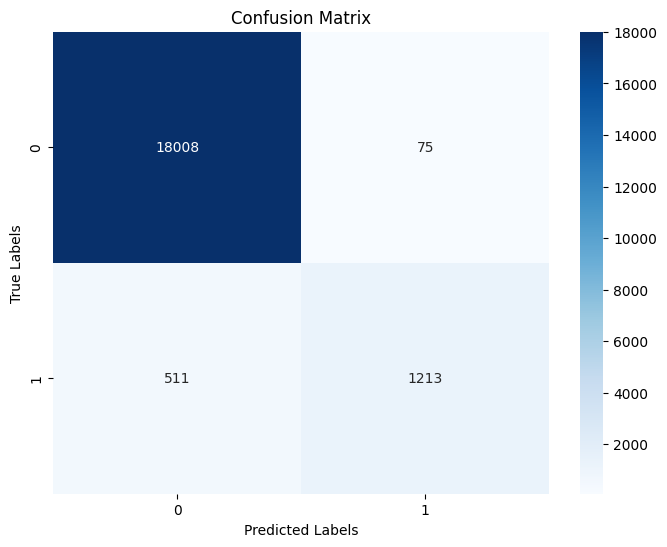

In [ ]:
print("\033[1m\033[4mLogistic Regression Model Evaluation\033[0m")
# Metrics
print("The logistic regression model has an accuracy score of:", accuracy_dtm, "and a precision score of:", precision_dtm)

# Confusion Matrix
cm_dtm = confusion_matrix(y_test, y_pred_dtm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_dtm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()